# NLP on CIAA-CIAA dataset
This notebook works on NLP by using the abstracts and titles from all the papers which where published at CIAA.
###### written by Nils Dyck, 27.10.2022

At first we have to import the dataset and the libraries we need.

In [1]:
# import packages
import pandas as pd
import sys
import networkx as nx 
import matplotlib.pyplot as plt

%matplotlib inline

#system test
print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")

# set datapath and separation parameter
datapath = "../data/cleaned/CIAA-CIAA.csv"
sep_parameter = ';'

# read data as data
data = pd.read_csv(datapath, sep = sep_parameter)

#see if we habe the right data
data.head()

Python version 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
networkx version: 2.7.1


,Author,Title,Co-Authors,Pagination,Published in,LNCS-link,Abstract
0,Yuan Gao,In Memoriam Sheng Yu.,Kai Salomaa,1-4,2012,https://doi.org/10.1007/978-3-642-31606-7_1,Professor Sheng Yu passed away unexpectedly in...
1,Kai Salomaa,In Memoriam Sheng Yu.,Yuan Gao,1-4,2012,https://doi.org/10.1007/978-3-642-31606-7_1,Professor Sheng Yu passed away unexpectedly in...
2,Janusz A. Brzozowski,In Search of Most Complex Regular Languages.,NaN,5-24,2012,https://doi.org/10.1007/978-3-642-31606-7_2,Regular languages that are most complex under ...
3,Andrzej Ehrenfeucht,A Formal Framework for Processes Inspired by t...,Grzegorz Rozenberg,25-27,2012,https://doi.org/10.1007/978-3-642-31606-7_3,Natural Computing is concerned with both human...
4,Grzegorz Rozenberg,A Formal Framework for Processes Inspired by t...,Andrzej Ehrenfeucht,25-27,2012,https://doi.org/10.1007/978-3-642-31606-7_3,Natural Computing is concerned with both human...


### Creating a Wordcloud from Titles
At first we need to tokenize the string conducted by the titles.

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

titles = data['Title'].to_list()
titles = set(titles) #so that there is no title twice
title_string = ''
for title in titles:
    title_string += title
title_string = title_string.lower()

tokenized = word_tokenize(title_string)
stop_words = set(stopwords.words('english'))

titles_filtered = [
    word for word in tokenized if word not in stop_words and word not in ['.',',',':','!','?','(',')']
]

Now we can create the wordcloud from the tokenized and filtered list:

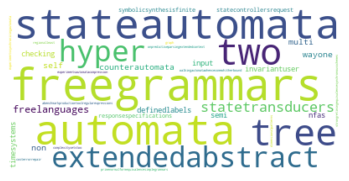

In [12]:
from wordcloud import WordCloud

string = ''
for title in titles_filtered:
    string += title
titlecloud = WordCloud(background_color='white', collocations=False).generate(string)
plt.imshow(titlecloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Creating a Wordcloud from Abstracts

Now we create a wordcloud from the abstracts of the papers by using the same technologies as we used to create wordcloud from the titles:

In [ ]:
abstracts = data['Abstract'].to_list()

abstract_string = ''

for abstract in abstracts:
    abstract_string += abstract
abstract_word_token = word_tokenize(abstract_string)
abstract_sent_token = sent_tokenize(abstract_string)